In [15]:
import pandas as pd



# Read the CSV file
file_path = '../preped.csv'
df = pd.read_csv(file_path)

In [16]:
print(df.columns)


Index(['Title', 'Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score',
       'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received',
       'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes',
       'Minimum Age', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance',
       'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

feature_columns = ['Is Series', 'Hidden Gem Score', 'Runtime', 'IMDb Score', 'Rotten Tomatoes Score', 'Metacritic Score', 'Awards Received', 'Awards Nominated For', 'Boxoffice', 'Release Date', 'IMDb Votes', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']
target_column = 'Minimum Age'

# Separate the features and target variable
X = df[feature_columns]
y = df[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Default to 5 neighbors
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

Mean Absolute Error: 3.169
Mean Squared Error: 22.542
R^2 Score: 0.183


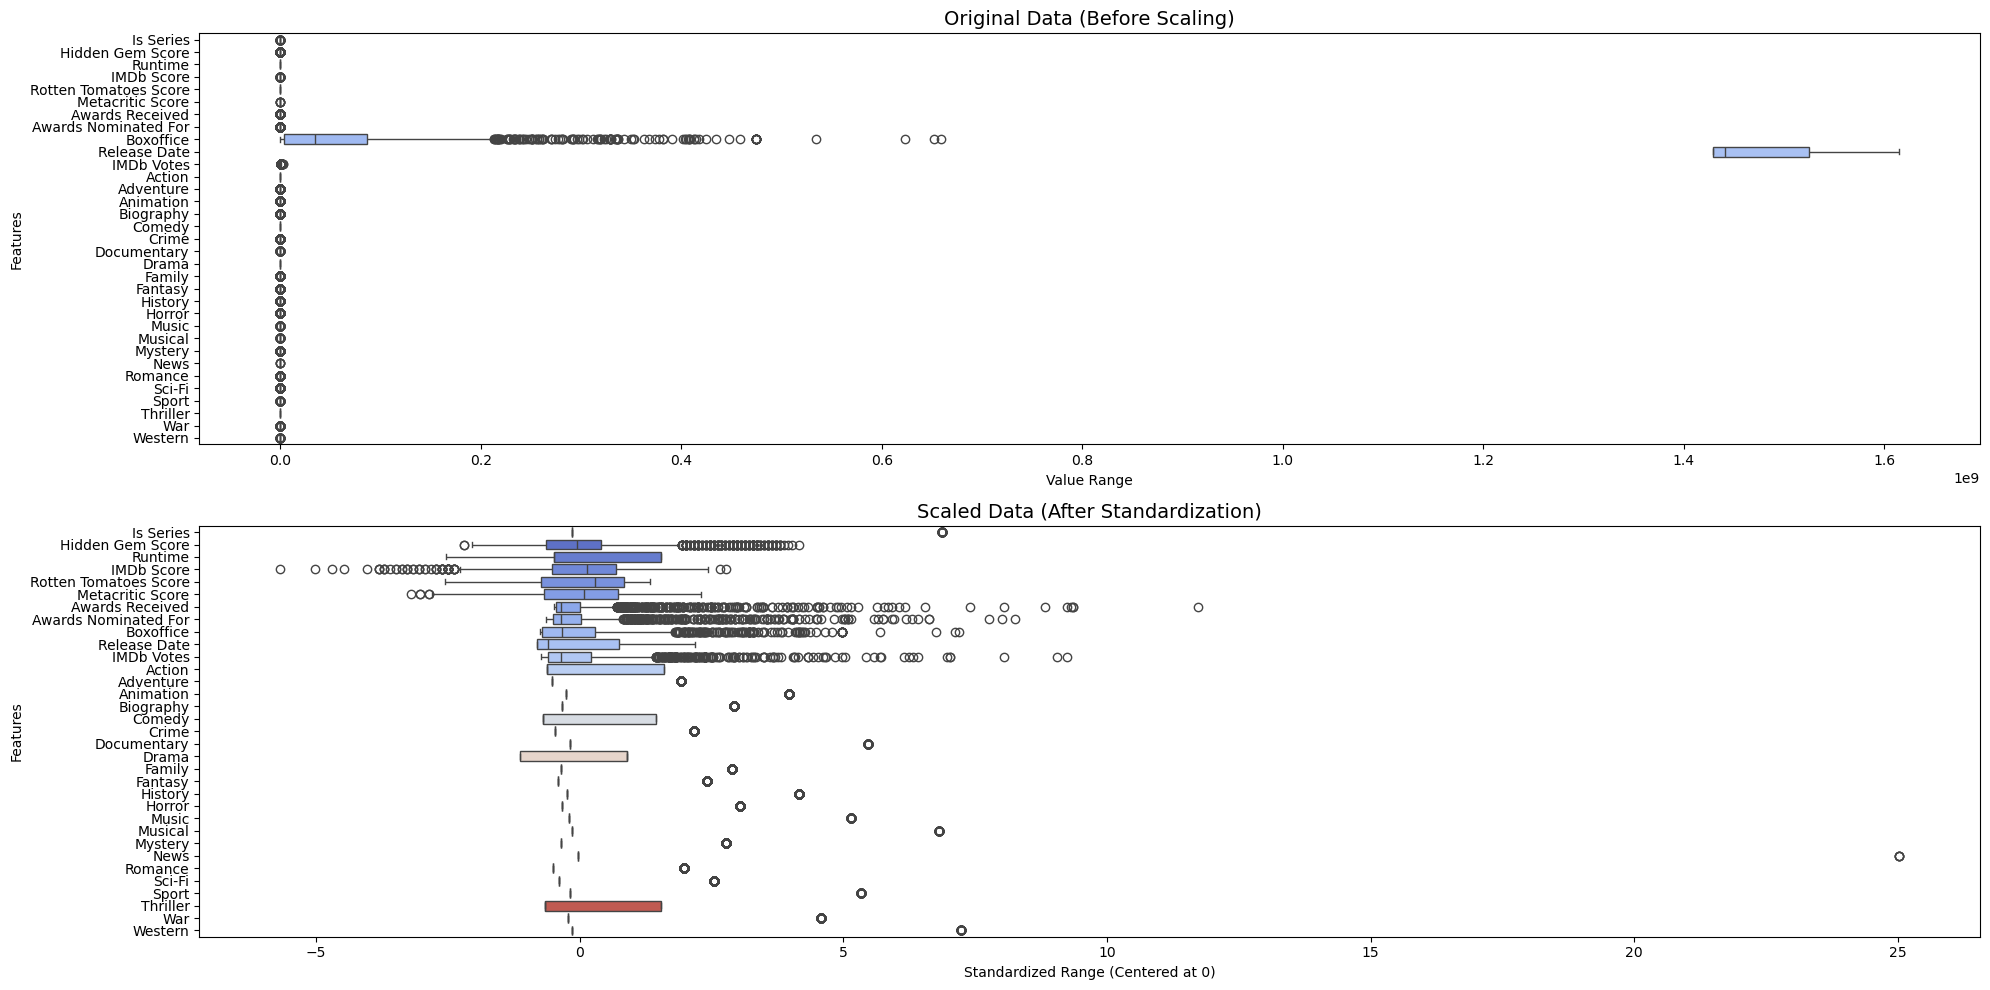

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Create a DataFrame for easier visualization
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns)

# Visualize the distributions of original and scaled data
plt.figure(figsize=(20, 10))

# Plot original data
plt.subplot(2, 1, 1)
sns.boxplot(data=X, orient='h', palette='coolwarm')
plt.title('Original Data (Before Scaling)', fontsize=14)
plt.xlabel('Value Range')
plt.ylabel('Features')

# Plot scaled data
plt.subplot(2, 1, 2)
sns.boxplot(data=scaled_df, orient='h', palette='coolwarm')
plt.title('Scaled Data (After Standardization)', fontsize=14)
plt.xlabel('Standardized Range (Centered at 0)')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=3, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'n_neighbors': 19}


In [20]:
# Use the best model from GridSearchCV
best_knn_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred_tuned = best_knn_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

# Print the evaluation metrics
print("Evaluation Metrics for the Tuned KNN Model:")
print(f"Mean Absolute Error: {mae_tuned:.3f}")
print(f"Mean Squared Error: {mse_tuned:.3f}")
print(f"R^2 Score: {r2_tuned:.3f}")


Evaluation Metrics for the Tuned KNN Model:
Mean Absolute Error: 3.122
Mean Squared Error: 20.295
R^2 Score: 0.264


Without tuning\
Mean Absolute Error: 3.169\
Mean Squared Error: 22.542\
R^2 Score: 0.183\

With tuning\
Mean Absolute Error: 3.122\
Mean Squared Error: 20.295\
R^2 Score: 0.264\

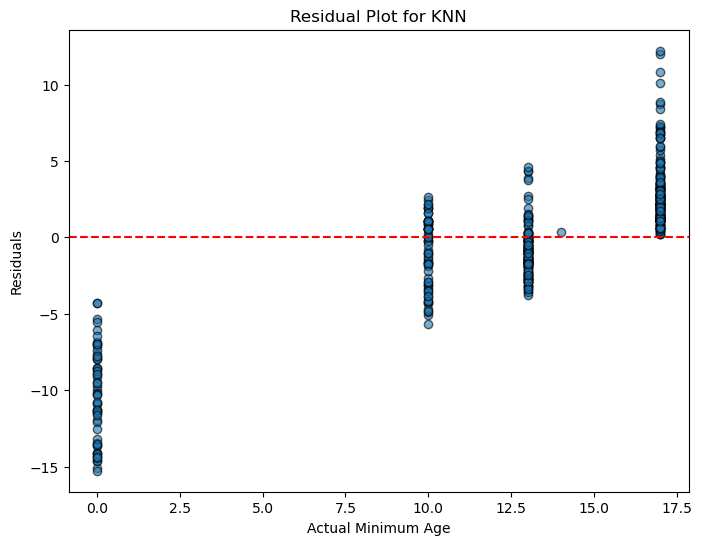

In [21]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_tuned
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6, edgecolor='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Minimum Age')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN')
plt.show()


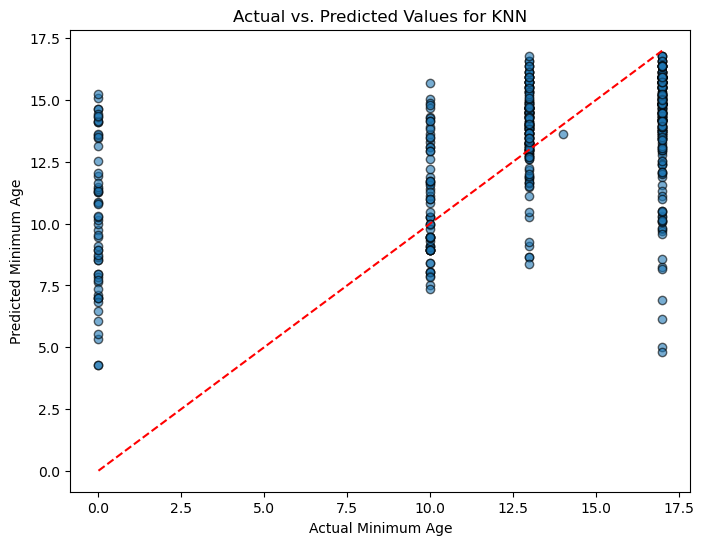

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.6, edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Minimum Age')
plt.ylabel('Predicted Minimum Age')
plt.title('Actual vs. Predicted Values for KNN')
plt.show()
